In [16]:
import numpy as np
import argparse

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
parser = argparse.ArgumentParser()
parser.add_argument("--dataset_in", default='MNIST',
                    help="dataset to be used")
parser.add_argument("--norm", default='l2',
                    help="norm to be used")
parser.add_argument('--num_samples', type=int, default=5000)
parser.add_argument('--n_classes', type=int, default=2)
parser.add_argument('--use_test', dest='use_test', action='store_true')

_StoreTrueAction(option_strings=['--use_test'], dest='use_test', nargs=0, const=True, default=False, type=None, choices=None, help=None, metavar=None)

In [3]:
args = parser.parse_args("--dataset=CIFAR-10 --n_classes=2 --num_samples=5000 --norm=l2".split())

In [4]:
class_1=3
class_2=7

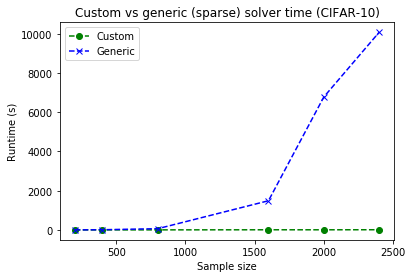

In [27]:
fig, ax = plt.subplots()
# ax.loglog(subsample_sizes, time_custom,'go--',label='custom',basex=2)
ax.plot(subsample_sizes, time_custom,'go--',label='Custom')
ax.plot(subsample_sizes, np.abs(time_generic), 'bx--', label='Generic')
# ax.loglog([5000],time_full[0],'go--',label='custom',basex=2)
# ax.loglog([5000],time_full[1],'ro--',label='custom new',basex=2)

ax.set(xlabel='Sample size', ylabel='Runtime (s)',
       title='Custom vs generic (sparse) solver time (CIFAR-10)')

# ax.set_yscale('log')

ax.legend()
plt.savefig('images/runtime/3_7_%s_5000_var_sample.pdf' % (args.dataset_in))
plt.show()

In [ ]:
time_full=[]
subsample_size=5000
if args.use_test:
    save_file_name = 'logloss_' + str(class_1) + '_' + str(class_2) + '_' + str(subsample_size) + '_' + args.dataset_in + '_test_' + args.norm
else:
    save_file_name = 'logloss_' + str(class_1) + '_' + str(class_2) + '_' + str(subsample_size) + '_' + args.dataset_in + '_' + args.norm
f2 = open('cost_results/timing_results/' + save_file_name + '.txt', 'r')
for i in range(2):
    a=f2.readline().split(',')
    if i==0:
        time_full.append(float(a[1]))
    else:
        time_full.append(float(a[1]))

In [ ]:
fig, ax = plt.subplots()
# ax.loglog(subsample_sizes, time_custom,'go--',label='custom',basex=2)
ax.loglog(subsample_sizes, time_custom_new,'ro--',label='custom new',basex=2)
ax.loglog(subsample_sizes, time_generic, 'bx--', label='generic (sparse)',basex=2)
# ax.loglog([5000],time_full[0],'go--',label='custom',basex=2)
# ax.loglog([5000],time_full[1],'ro--',label='custom new',basex=2)

ax.set(xlabel='Sample size', ylabel='Runtime (s)',
       title='Custom vs generic (sparse) solver time (CIFAR-10)')
ax.legend()
plt.savefig('trial_%s.pdf' % (args.dataset_in))
plt.show()

In [30]:
subsample_size=5000
if args.use_test:
    save_file_name = 'logloss_' + str(class_1) + '_' + str(class_2) + '_' + str(subsample_size) + '_' + args.dataset_in + '_test_' + args.norm
else:
    save_file_name = 'logloss_' + str(class_1) + '_' + str(class_2) + '_' + str(subsample_size) + '_' + args.dataset_in + '_' + args.norm
A_5k=np.loadtxt('cost_results/timing_results/' + save_file_name + '.txt',delimiter=',',max_rows=16)

In [32]:
custom_x=A_5k[:,0]

In [33]:
custom_y=A_5k[:,1]

In [34]:
generic_y=A_5k[:,3]

In [35]:
generic_y_plot=generic_y[np.where(generic_y>0)]
generic_x=custom_x[np.where(generic_y>0)]

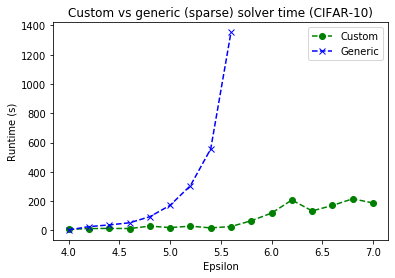

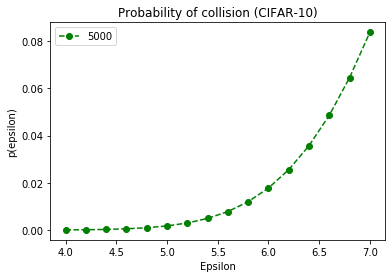

In [14]:
fig, ax = plt.subplots()
# ax.loglog(subsample_sizes, time_custom,'go--',label='custom',basex=2)
ax.plot(custom_x, A[:,-1]/(5000*5000),'go--',label='5000')
# ax.plot(generic_x, generic_y_plot, 'bx--', label='Generic')
# ax.loglog([5000],time_full[0],'go--',label='custom',basex=2)
# ax.loglog([5000],time_full[1],'ro--',label='custom new',basex=2)

ax.set(xlabel='Epsilon', ylabel='p(epsilon)',
       title='Probability of collision (CIFAR-10)')

# ax.set_yscale('log')

ax.legend()
plt.savefig('images/runtime/3_7_%s_5000_var_eps_collision_prob.pdf' % (args.dataset_in))
plt.show()

200
400
800
1600
2000
2400


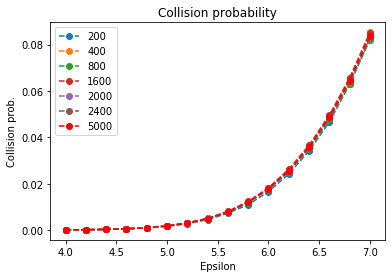

In [36]:
subsample_sizes = [200,400,800,1600,2000,2400]

fig1, ax1 = plt.subplots()

time_custom=[]
time_generic=[]

for subsample_size in subsample_sizes:
    print(subsample_size)
    if args.use_test:
        save_file_name = 'logloss_' + str(class_1) + '_' + str(class_2) + '_' + str(subsample_size) + '_' + args.dataset_in + '_test_' + args.norm
    else:
        save_file_name = 'logloss_' + str(class_1) + '_' + str(class_2) + '_' + str(subsample_size) + '_' + args.dataset_in + '_' + args.norm
    A_1=np.loadtxt('cost_results/timing_results/' + save_file_name + '.txt',delimiter=',',max_rows=12)
    A_2=np.loadtxt('cost_results/timing_results/' + save_file_name + '.txt',delimiter=',',skiprows=12)
    time_custom.append(A_1[11,1])
    time_generic.append(A_1[11,3])
    x_axis=np.hstack((A_1[:,0],A_2[:,0]))
    collision_prob=np.hstack((A_1[:,5],A_2[:,3]))/(subsample_size**2)
    ax1.plot(x_axis,collision_prob,'o--',label=str(subsample_size))
ax1.plot(custom_x, A_5k[:,-1]/(5000*5000),'ro--',label='5000')
ax1.set(xlabel='Epsilon', ylabel='Collision prob.',
       title='Collision probability')
ax1.legend()
plt.savefig('images/runtime/3_7_%s_5000_var_eps_collision_prob.pdf' % (args.dataset_in))